In [1]:
import pandas as pd

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import warnings

In [5]:
# iris dataset
from sklearn import datasets
iris=datasets.load_iris()

In [6]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [7]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
print(iris.data[0:5])
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
df=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'species':iris.target
})

In [11]:
df.head()

,sepal length,sepal width,petal length,species
0,5.1,3.5,1.4,0
1,4.9,3.0,1.4,0
2,4.7,3.2,1.3,0
3,4.6,3.1,1.5,0
4,5.0,3.6,1.4,0


In [12]:
df.describe()

,sepal length,sepal width,petal length,species
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.000000
std,0.828066,0.435866,1.765298,0.819232
min,4.300000,2.000000,1.000000,0.000000
25%,5.100000,2.800000,1.600000,0.000000
50%,5.800000,3.000000,4.350000,1.000000
75%,6.400000,3.300000,5.100000,2.000000
max,7.900000,4.400000,6.900000,2.000000


In [13]:
df.shape

(150, 4)

In [14]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
species         0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   species       150 non-null    int32  
dtypes: float64(3), int32(1)
memory usage: 4.2 KB


In [16]:
df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

<AxesSubplot:>

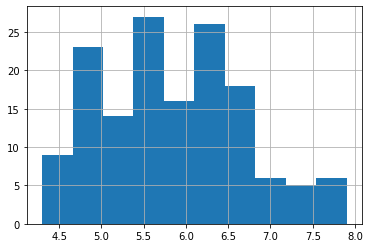

In [18]:
df['sepal length'].hist()

<AxesSubplot:>

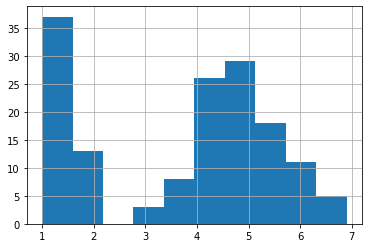

In [19]:
df['petal length'].hist()

<AxesSubplot:>

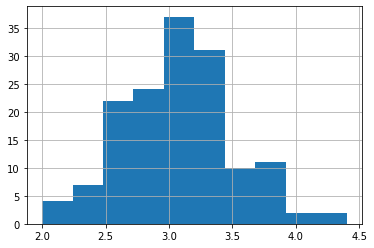

In [20]:
df['sepal width'].hist()

In [21]:
colors=['red','purple','orange']
species=['setosa' 'versicolor' 'virginica']

In [22]:
df['species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

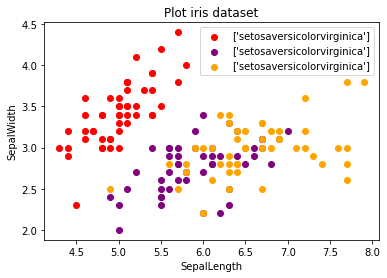

In [23]:
for i in range(3):
    x=df[df['species']==i]
    plt.scatter(x['sepal length'],x['sepal width'],c=colors[i],label=['setosa' 'versicolor' 'virginica'])
plt.title('Plot iris dataset')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend()

In [25]:
from sklearn.manifold import TSNE
tsne =TSNE(n_components=2,random_state=0)
X_2d=tsne.fit_transform(df)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

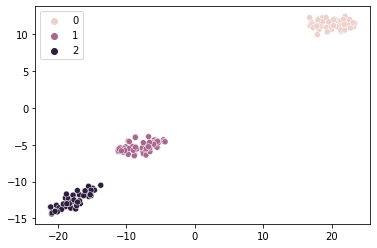

In [26]:
sns.scatterplot(X_2d[:,0],X_2d[:,1],hue=iris.target)

In [27]:
df.corr()

,sepal length,sepal width,petal length,species
sepal length,1.000000,-0.117570,0.871754,0.782561
sepal width,-0.117570,1.000000,-0.428440,-0.426658
petal length,0.871754,-0.428440,1.000000,0.949035
species,0.782561,-0.426658,0.949035,1.000000


<AxesSubplot:>

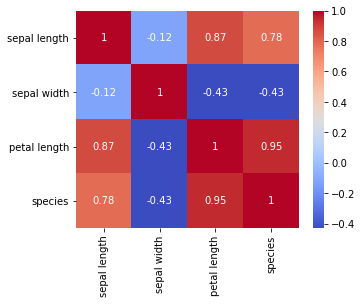

In [30]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

In [41]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['species'])
y=df['species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)
print(x_train.shape)
print(x_test.shape)

(105, 3)
(45, 3)


In [42]:
#Support Vector Machine
from sklearn.svm import SVC
svm=SVC(kernel="linear",random_state=4)
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)

In [43]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred,y_test))

[[21  0  0]
 [ 0  9  0]
 [ 0  1 14]]


In [44]:
accuracy_svm=svm.score(x_test,y_test)*100
print("accuracy of SVM model is ",accuracy_svm)

accuracy of SVM model is  97.77777777777777
